# Data Collection and Preparation.

# Mary Donovan Martello

## The first part of this project consisted of collecting, cleaning and preparing data from three different sources: a flat file, a website (collected by scraping the website), and an API. This notebook joins all three sources on the same key, stores the data in a SQLite database, and executes SQL commands.

# Part 4:  Join Data / Store in Database

In [2]:
%matplotlib inline

# import libraries

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm
import sqlite3


## Create SQLite Database

### I created a SQLite database using DB Browser for SQLite, and loaded the three cleaned and transformed datasets to the SQLite database.

## Join the Three Database Tables

### Connect to the Database

In [3]:
# make the connection to database
#conn = sqlite3.connect("petsdb")
conn = sqlite3.connect('Milestone5.db')

In [4]:
# check whether the connection has been successful
def is_opened(conn):
    try:
        conn.execute("SELECT * FROM api LIMIT 1")
        return True
    except sqlite3.ProgrammingError as e:
        print("Connection closed {}".format(e))
        return False

In [5]:
print(is_opened(conn))

True


### Join the three database tables.

In [6]:
# Use SQL to join the three tables and append each row of the joined table to a list
# Data Wrangling Book page 319
data = []
cursor = conn.cursor()
cursor.execute("PRAGMA foreign_keys = 1")
    
sql = """
    SELECT * FROM flat 
    LEFT JOIN web ON flat.fund_name = web.fund_name 
    LEFT JOIN api ON web.fund_name = api.fund_name
"""
# 
rows = cursor.execute(sql)
for row in rows:
    data.append(row)

In [51]:
len(data)

26908

In [7]:
# list of column names for the merged database table

columns = ['fund_name_f', 'fund_extended_name_f', 'category', 'fund_family', 'net_assets_f', 'ytd_return', 'fund_yield',
           'morningstar_rating', 'inception_date_f', 'investment', 'size', 'currency', 'net_annual_expense_ratio_fund_f',
           'net_annual_expense_ratio_category', 'portfolio_cash', 'portfolio_stocks', 'portfolio_bonds', 'portfolio_others',
           'portfolio_preferred', 'portfolio_convertable', 'price_earnings', 'price_book', 'price_sales', 'price_cashflow',
           'median_market_cap', 'basic_materials', 'consumer_cyclical', 'financial_services', 'real_estate', 
           'consumer_defensive', 'healthcare', 'utilities', 'communication_services', 'energy', 'industrials', 'technology',
           'bond_maturity', 'bond_duration', 'rating_us_government', 'rating_aaa', 'rating_aa', 'rating_a', 'rating_bbb', 
           'rating_bb', 'rating_b', 'rating_below_b', 'rating_others', 'morningstar_return_rating', 'fund_return_ytd_f', 
           'category_return_ytd', 'fund_return_1month', 'category_return_1month', 'fund_return_3months', 'fund_return_1year_f',
           'category_return_1year', 'fund_return_3years_f', 'category_return_3years', 'fund_return_5years_f', 
           'category_return_5years', 'fund_return_10years_f', 'category_return_10years', 'fund_return_2018', 
           'category_return_2018', 'fund_return_2017', 'category_return_2017', 'fund_return_2016', 'category_return_2016',
           'fund_return_2015', 'category_return_2015', 'fund_return_2014', 'category_return_2014', 'fund_return_2013',
           'category_return_2013', 'fund_return_2012', 'category_return_2012', 'fund_return_2011', 'category_return_2011',
           'fund_return_2010', 'category_return_2010', 'morningstar_risk_rating', 'years_up', 'years_down', 'fund_alpha_3years',
           'category_alpha_3years', 'fund_alpha_5years', 'category_alpha_5years', 'fund_alpha_10years', 'category_alpha_10years',
           'fund_beta_3years', 'category_beta_3years', 'fund_beta_5years', 'category_beta_5years', 'fund_beta_10years', 
           'category_beta_10years', 'fund_mean_annual_return_3years', 'category_mean_annual_return_3years', 
           'fund_mean_annual_return_5years', 'category_mean_annual_return_5years', 'fund_mean_annual_return_10years',
           'category_mean_annual_return_10years', 'fund_r_squared_3years', 'category_r_squared_3years', 'fund_r_squared_5years',
           'category_r_squared_5years', 'fund_r_squared_10years', 'category_r_squared_10years', 'fund_standard_deviation_3years',
           'category_standard_deviation_3years', 'fund_standard_deviation_5years', 'category_standard_deviation_5years', 
           'fund_standard_deviation_10years', 'category_standard_deviation_10years', 'fund_sharpe_ratio_3years', 
           'category_sharpe_ratio_3years', 'fund_sharpe_ratio_5years', 'category_sharpe_ratio_5years', 'fund_sharpe_ratio_10years',
           'category_sharpe_ratio_10years', 'fund_treynor_ratio_3years', 'category_treynor_ratio_3years', 'fund_treynor_ratio_5years',
           'category_treynor_ratio_5years', 'fund_treynor_ratio_10years', 'category_treynor_ratio_10years', 
           'fund_name_w', 'fund_extended_name_w',
           'Fund Type', 'inception_date_w', 'net_assets_w', 'fund_return_ytd_w', 'fund_return_1year_w', 'fund_return_3years_w',
           'fund_return_5years_w', 'fund_return_10years_w', 'Prev YrRtn %', 'MgmtFee %', 'net_annual_expense_ratio_fund_w', 'StdDev',
           'Benchmark Used',
           'fund_name_a', 'date', 'revenuePerShare', 'netIncomePerShare', 'operatingCashFlowPerShare', 'freeCashFlowPerShare',
           'cashPerShare', 'bookValuePerShare', 'tangibleBookValuePerShare', 'shareholdersEquityPerShare', 'interestDebtPerShare',
           'marketCap', 'enterpriseValue', 'peRatio', 'priceToSalesRatio', 'pocfratio', 'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales',
           'enterpriseValueOverEBITDA', 'evToOperatingCashFlow', 'evToFreeCashFlow', 'earningsYield', 'freeCashFlowYield', 'debtToEquity',
           'debtToAssets', 'netDebtToEBITDA', 'currentRatio', 'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio',
           'salesGeneralAndAdministrativeToRevenue', 'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets', 
           'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation', 'stockBasedCompensationToRevenue', 'grahamNumber',
           'roic', 'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital', 'tangibleAssetValue', 'netCurrentAssetValue', 
           'investedCapital', 'averageReceivables', 'averagePayables', 'averageInventory', 'daysSalesOutstanding', 
           'daysPayablesOutstanding', 'daysOfInventoryOnHand', 'receivablesTurnover', 'payablesTurnover', 'inventoryTurnover',
           'roe', 'capexPerShare']

In [8]:
# Create a dataframe from the data list of merged database rows
df = pd.DataFrame(data, columns=columns)

In [40]:
# Set it None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [97]:
df.head(3)

,fund_name_f,fund_extended_name_f,category,fund_family,net_assets_f,ytd_return,fund_yield,morningstar_rating,inception_date_f,investment,size,currency,net_annual_expense_ratio_fund_f,net_annual_expense_ratio_category,portfolio_cash,portfolio_stocks,portfolio_bonds,portfolio_others,portfolio_preferred,portfolio_convertable,price_earnings,price_book,price_sales,price_cashflow,median_market_cap,basic_materials,consumer_cyclical,financial_services,real_estate,consumer_defensive,healthcare,utilities,communication_services,energy,industrials,technology,bond_maturity,bond_duration,rating_us_government,rating_aaa,rating_aa,rating_a,rating_bbb,rating_bb,rating_b,rating_below_b,rating_others,morningstar_return_rating,fund_return_ytd_f,category_return_ytd,fund_return_1month,category_return_1month,fund_return_3months,fund_return_1year_f,category_return_1year,fund_return_3years_f,category_return_3years,fund_return_5years_f,category_return_5years,fund_return_10years_f,category_return_10years,fund_return_2018,category_return_2018,fund_return_2017,category_return_2017,fund_return_2016,category_return_2016,fund_return_2015,category_return_2015,fund_return_2014,category_return_2014,fund_return_2013,category_return_2013,fund_return_2012,category_return_2012,fund_return_2011,category_return_2011,fund_return_2010,category_return_2010,morningstar_risk_rating,years_up,years_down,fund_alpha_3years,category_alpha_3years,fund_alpha_5years,category_alpha_5years,fund_alpha_10years,category_alpha_10years,fund_beta_3years,category_beta_3years,fund_beta_5years,category_beta_5years,fund_beta_10years,category_beta_10years,fund_mean_annual_return_3years,category_mean_annual_return_3years,fund_mean_annual_return_5years,category_mean_annual_return_5years,fund_mean_annual_return_10years,category_mean_annual_return_10years,fund_r_squared_3years,category_r_squared_3years,fund_r_squared_5years,category_r_squared_5years,fund_r_squared_10years,category_r_squared_10years,fund_standard_deviation_3years,category_standard_deviation_3years,fund_standard_deviation_5years,category_standard_deviation_5years,fund_standard_deviation_10years,category_standard_deviation_10years,fund_sharpe_ratio_3years,category_sharpe_ratio_3years,fund_sharpe_ratio_5years,category_sharpe_ratio_5years,fund_sharpe_ratio_10years,category_sharpe_ratio_10years,fund_treynor_ratio_3years,category_treynor_ratio_3years,fund_treynor_ratio_5years,category_treynor_ratio_5years,fund_treynor_ratio_10years,category_treynor_ratio_10years,fund_name_w,fund_extended_name_w,Fund Type,inception_date_w,net_assets_w,fund_return_ytd_w,fund_return_1year_w,fund_return_3years_w,fund_return_5years_w,fund_return_10years_w,Prev YrRtn %,MgmtFee %,net_annual_expense_ratio_fund_w,StdDev,Benchmark Used,fund_name_a,date,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,5.302800e+08,12.79,1.43,3,2007,Blend,Large,USD,1.22,1.01,3.80,76.25,15.35,4.60,0.00,0.0,21.58,1.93,2.417503,9.81,"14,247.52",7.48,0.16,0.00,39.52,0.93,0.00,19.56,5.02,

In [55]:
df.shape

(26908, 198)

## Data Cleaning

### Fill missing values.

In [100]:
# check for missing values
for c in df.columns:
    miss = df[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))

fund_name_w has 25141 missing value(s)
fund_extended_name_w has 25141 missing value(s)
Fund Type has 25141 missing value(s)
inception_date_w has 25141 missing value(s)
net_assets_w has 25141 missing value(s)
fund_return_ytd_w has 25141 missing value(s)
fund_return_1year_w has 25141 missing value(s)
fund_return_3years_w has 25141 missing value(s)
fund_return_5years_w has 25141 missing value(s)
fund_return_10years_w has 25141 missing value(s)
Prev YrRtn % has 25141 missing value(s)
MgmtFee % has 25141 missing value(s)
net_annual_expense_ratio_fund_w has 25141 missing value(s)
StdDev has 25141 missing value(s)
Benchmark Used has 25141 missing value(s)
fund_name_a has 25144 missing value(s)
date has 25144 missing value(s)
revenuePerShare has 25298 missing value(s)
netIncomePerShare has 25298 missing value(s)
operatingCashFlowPerShare has 25298 missing value(s)
freeCashFlowPerShare has 25298 missing value(s)
cashPerShare has 25298 missing value(s)
bookValuePerShare has 25298 missing value(s

In [9]:
# fill missing values in the merged dataset
df.fillna(0,inplace=True)

In [10]:
# confirm no missing values
df.isnull().any().sum()

0

## Send Merged Dataframe to Database

In [11]:
df.to_sql("mergedDBs", conn, if_exists="replace")

C:\Users\trave\Anaconda3\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [12]:
pd.read_sql_query("select * from mergedDBs LIMIT 1", conn)

,index,fund_name_f,fund_extended_name_f,category,fund_family,net_assets_f,ytd_return,fund_yield,morningstar_rating,inception_date_f,...,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
0,0,AAAAX,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,530280000.0,12.79,1.43,3,2007,...,0,0,0,0,0,0,0,0,0.0,0.0


# SQL

## Execute SQL commands on the database to create simple visualizations.

### Visual #1:  Histogram

Text(0.5, 1.0, 'Inception Date Counts')

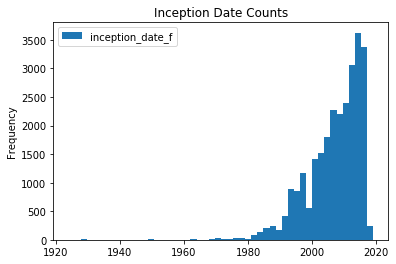

In [25]:
inceptionDates = pd.read_sql("SELECT inception_date_f FROM mergedDBs", conn).astype(float)
inceptionDates.plot.hist(bins=50)
plt.title("Inception Date Counts")

### Visualization # 2:  Scatter plot

Text(0.5, 1.0, 'Fund Returns')

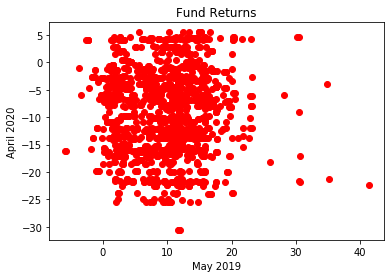

In [125]:
May2019 = pd.read_sql("SELECT fund_return_ytd_f FROM mergedDBs LIMIT 1767", conn).astype(float)
April2020 = pd.read_sql("SELECT fund_return_ytd_w FROM mergedDBs WHERE fund_return_ytd_w != 0", conn).astype(float)
plt.scatter(May2019, April2020, color="red")
plt.xlabel("May 2019")
plt.ylabel("April 2020")
plt.title("Fund Returns")

### Visualization #3:  line plots 

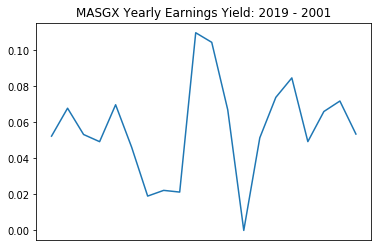

In [131]:

masgx = pd.read_sql("SELECT earningsYield FROM mergedDBs WHERE fund_name_a = 'MASGX'", conn).astype(float)
plt.title("MASGX Yearly Earnings Yield: 2019 - 2001")
plt.xticks(np.arange(2019, 2001, step=-3))  # Set label locations
plt.plot(masgx)

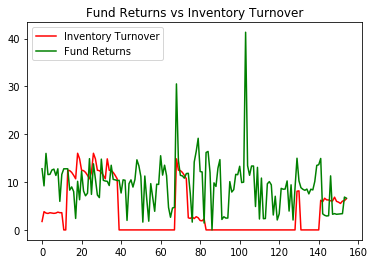

In [239]:
plt.title("Fund Returns vs Inventory Turnover")
apiInvTurn = pd.read_sql("SELECT inventoryTurnover FROM mergedDBs WHERE roe > 0 LIMIT 155", conn).astype(float)
flatFundReturn = pd.read_sql("SELECT fund_return_ytd_f FROM mergedDBs LIMIT 155", conn).astype(float)
x1 = np.arange(0, 155, step=1)
x2 = np.arange(0, 155, step=1)
plt.plot(x1, apiDivYield, label='Inventory Turnover', color = "red") 
plt.plot(x2, flatFundReturn, label='Fund Returns', color = 'green')
plt.legend()


### Visualization #4: Density plot

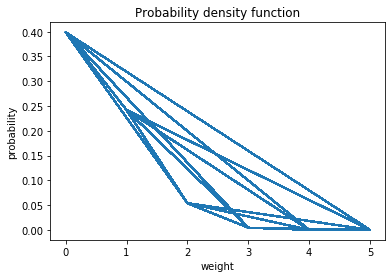

In [211]:
morningstarRating = pd.read_sql("SELECT morningstar_rating FROM mergedDBs", conn).astype(float)
plt.title("Probability density function")
plt.xlabel("weight")
plt.ylabel("probability")
x=morningstarRating
y=norm.pdf(x)
plt.plot(x,y)

### Visualization #5: Pie chart

Text(0.5, 1.0, 'AABFX Portfolio')

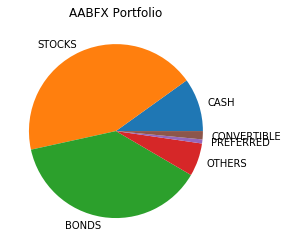

In [236]:
portfolioS = pd.read_sql("SELECT portfolio_cash, portfolio_stocks, portfolio_bonds, portfolio_others, portfolio_preferred, portfolio_convertable FROM mergedDBs WHERE fund_name_f = 'AABFX'", conn).astype(float)
plt.pie(portfolio,labels=['CASH','STOCKS','BONDS','OTHERS','PREFERRED', 'CONVERTIBLE'])
plt.title("AABFX Portfolio")

In [26]:
# close the connection
conn.close()